In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("correlation_heat_map.csv")

In [3]:
data.sum(axis=0)

Metrics                           Baseline-VUMCmedGAN-VUMCmedBGAN-VUMCEMR-WGAN-V...
Dimension-wise distribution                                                   171.0
Column-wise correlation                                                       170.9
Latent cluster analysis                                                       171.0
Clinical knowledge violation                                                  171.0
Medical concept abundance                                                     170.9
TRTS Model performance                                                        171.0
TSTR Model performance                                                        171.1
Feature selection                                                             171.0
Attribute inference                                                           171.0
Membership inference                                                          171.1
Meaningful identity disclosure                                              

In [4]:
data = data.iloc[:12,:]
data

,Metrics,Dimension-wise distribution,Column-wise correlation,Latent cluster analysis,Clinical knowledge violation,Medical concept abundance,TRTS Model performance,TSTR Model performance,Feature selection,Attribute inference,Membership inference,Meaningful identity disclosure,NNAA-based loss
0,Baseline-VUMC,2.0,17.0,17.0,17.0,17.0,17.0,15.0,16.3,9.0,2.5,2.0,7.0
1,medGAN-VUMC,16.3,12.7,12.3,9.0,11.3,6.0,9.0,9.2,4.0,9.0,5.3,6.3
2,medBGAN-VUMC,11.0,10.0,7.0,10.0,11.3,10.3,13.7,11.5,5.0,10.3,10.3,5.7
3,EMR-WGAN-VUMC,6.7,3.3,3.7,6.0,2.0,3.3,3.3,10.3,16.2,17.0,17.0,17.0
4,WGAN-VUMC,6.3,3.7,5.0,2.0,5.7,7.3,7.3,4.3,14.8,12.0,13.3,13.3
5,DPGAN-VUMC,14.7,10.3,12.0,13.0,9.7,13.0,8.7,5.3,8.0,6.2,9.0,7.7
6,Baseline-UW-com,2.0,8.0,13.0,16.3,14.0,17.0,16.0,11.3,7.0,4.0,7.0,5.7
7,medGAN-UW-com,12.3,10.3,10.3,11.7,8.7,11.0,10.0,11.2,5.3,10.0,7.0,12.0
8,medBGAN-UW-com,8.0,6.3,5.7,6.7,9.3,9.7,9.0,6.7,11.0,10.3,10.0,10.0
9,EMR-WGAN-UW-com,5.0,2.0,2.0,2.0,2.0,3.7,2.0,2.0,17.0,17.0,15.2,15.0


In [5]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            pvalues[r][c] = round(pearsonr(df[r], df[c])[1], 4)
    return pvalues

calculate_pvalues(data) 

,Dimension-wise distribution,Column-wise correlation,Latent cluster analysis,Clinical knowledge violation,Medical concept abundance,TRTS Model performance,TSTR Model performance,Feature selection,Attribute inference,Membership inference,Meaningful identity disclosure,NNAA-based loss
Dimension-wise distribution,0.0,0.1568,0.4253,0.8366,0.7015,0.4002,0.9335,0.7821,0.265,0.8,0.5426,0.2992
Column-wise correlation,0.1568,0.0,0.0001,0.0242,0.0017,0.1161,0.0243,0.0032,0.0696,0.0038,0.0047,0.0035
Latent cluster analysis,0.4253,0.0001,0.0,0.0104,0.0001,0.0115,0.0031,0.0054,0.1879,0.0,0.0001,0.0025
Clinical knowledge violation,0.8366,0.0242,0.0104,0.0,0.0335,0.0036,0.026,0.0454,0.0104,0.0094,0.0998,0.0337
Medical concept abundance,0.7015,0.0017,0.0001,0.0335,0.0,0.0024,0.0,0.0057,0.2523,0.0,0.0,0.0001
TRTS Model performance,0.4002,0.1161,0.0115,0.0036,0.0024,0.0,0.0004,0.1105,0.274,0.0002,0.011,0.0243
TSTR Model performance,0.9335,0.0243,0.0031,0.026,0.0,0.0004,0.0,0.0087,0.2047,0.0001,0.001,0.0008
Feature selection,0.7821,0.0032,0.0054,0.0454,0.0057,0.1105,0.0087,0.0,0.3595,0.0288,0.0201,0.0663
Attribute inference,0.265,0.0696,0.1879,0.0104,0.2523,0.274,0.2047,0.3595,0.0,0.2144,0.3815,0.041
Membership inference,0.8,0.0038,0.0,0.0094,0.0,0.0002,0.0001,0.0288,0.2144,0.0,0.0002,0.0005


<AxesSubplot:>

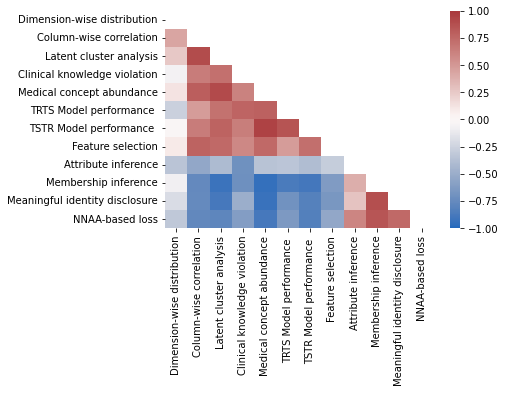

In [6]:
plt.clf()
corr = data.corr(method='pearson')
mask = np.triu(corr)
sns.heatmap(corr,mask=mask,cmap="vlag",vmin=-1, vmax=1)
#plt.savefig(f'./test_heatmap.svg',bbox_inches='tight', format='svg')   

In [7]:
corr

,Dimension-wise distribution,Column-wise correlation,Latent cluster analysis,Clinical knowledge violation,Medical concept abundance,TRTS Model performance,TSTR Model performance,Feature selection,Attribute inference,Membership inference,Meaningful identity disclosure,NNAA-based loss
Dimension-wise distribution,1.000000,0.435706,0.254181,-0.066779,0.123798,-0.267742,-0.027060,0.089512,-0.349808,-0.081985,-0.195499,-0.327177
Column-wise correlation,0.435706,1.000000,0.895138,0.642641,0.802121,0.477859,0.642408,0.773489,-0.540542,-0.764552,-0.752970,-0.768089
Latent cluster analysis,0.254181,0.895138,1.000000,0.705509,0.902457,0.698787,0.773775,0.745840,-0.408029,-0.928365,-0.885710,-0.784746
Clinical knowledge violation,-0.066779,0.642641,0.705509,1.000000,0.614409,0.767004,0.636700,0.585747,-0.705440,-0.712248,-0.497525,-0.613881
Medical concept abundance,0.123798,0.802121,0.902457,0.614409,1.000000,0.786734,0.938767,0.742368,-0.358603,-0.950218,-0.931737,-0.882974
TRTS Model performance,-0.267742,0.477859,0.698787,0.767004,0.786734,1.000000,0.854565,0.484369,-0.343717,-0.874513,-0.701290,-0.642322
TSTR Model performance,-0.027060,0.642408,0.773775,0.636700,0.938767,0.854565,1.000000,0.717069,-0.394243,-0.890994,-0.823166,-0.833473
Feature selection,0.089512,0.773489,0.745840,0.585747,0.742368,0.484369,0.717069,1.000000,-0.290601,-0.628005,-0.657768,-0.546002
Attribute inference,-0.349808,-0.540542,-0.408029,-0.705440,-0.358603,-0.343717,-0.394243,-0.290601,1.000000,0.386644,0.278062,0.595713
Membership inference,-0.081985,-0.764552,-0.928365,-0.712248,-0.950218,-0.874513,-0.890994,-0.628005,0.386644,1.000000,0.879366,0.844765
